In [1]:
from mb_rag.basic import ModelFactory
llm = ModelFactory(model_name="gemini-3-pro-preview",model_type='google')
# llm = ModelFactory(model_name="gemini-2.5-pro", model_type='google')

/home/malav/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from mb_rag.agents.get_langsmith import set_langsmith_parameters
import os
from dotenv import load_dotenv
load_dotenv()
set_langsmith_parameters(langsmith_endpoint="https://api.smith.langchain.com",
                        langsmith_project="BB-Labeling-Agent-Project",
                        langsmith_tracing="true")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [3]:
from mb_rag.agents.seg_autolabel import create_bb_agent,SegmentationGraph

In [4]:
agent = create_bb_agent(llm.model,logging=False,langsmith_params=True)
graph_agent = SegmentationGraph(agent)

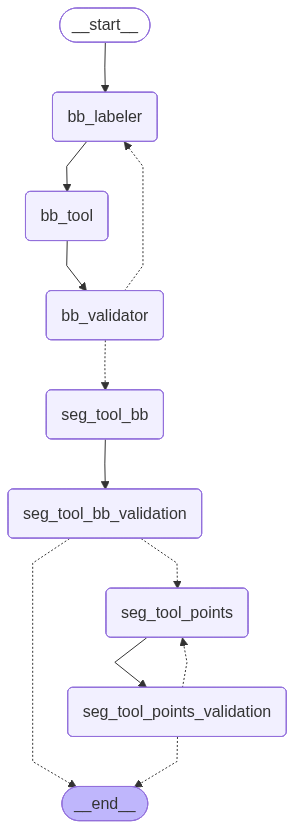

In [5]:
from IPython.display import Image, display
display(Image(graph_agent._build_graph().get_graph(xray=True).draw_mermaid_png()))

/home/malav/.local/lib/python3.11/site-packages/pydantic/v1/main.py:1048: UserWarning: LangSmith now uses UUID v7 for run and trace identifiers. This warning appears when passing custom IDs. Please use: from langsmith import uuid7
            id = uuid7()
Future versions will require UUID v7.
  input_data = validator(cls_, input_data)


STATE in bb labeler : {'temp_bb_img_path': './data/temp_bb_image.jpg', 'temp_segm_mask_path': './data/temp_seg_image_bb.jpg', 'temp_segm_mask_points_path': './data/temp_seg_image_points.jpg', 'positve_points': [], 'negative_points': [], 'bb_valid': False, 'seg_validation_reason': '', 'seg_valid': False, 'query': 'Create a bounding box around waste bins in the image.', 'image_path': './data/yolomuf_test3.jpeg', 'failed_labels': [], 'failed_segmentation': [], 'sam_model_path': './models/sam2_hiera_small.pt'}
STATE  in bb tool : {'messages': [{'role': 'agent', 'content': '{\n  "labeled_objects": [\n    {\n      "label": "waste bins",\n      "box": [\n        0.352,\n        0.536,\n        0.635,\n        0.900\n      ],\n      "valid": false\n    },\n    {\n      "label": "waste bins",\n      "box": [\n        0.117,\n        0.676,\n        0.330,\n        0.940\n      ],\n      "valid": false\n    }\n  ]\n}'}], 'labeled_objects': [{'label': 'waste bins', 'box': [0.352, 0.536, 0.635, 0.

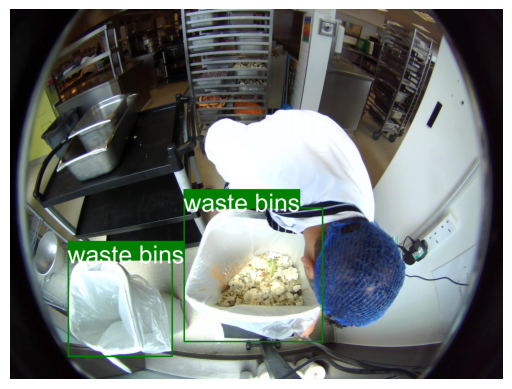

Validation successful.


/home/malav/.local/lib/python3.11/site-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


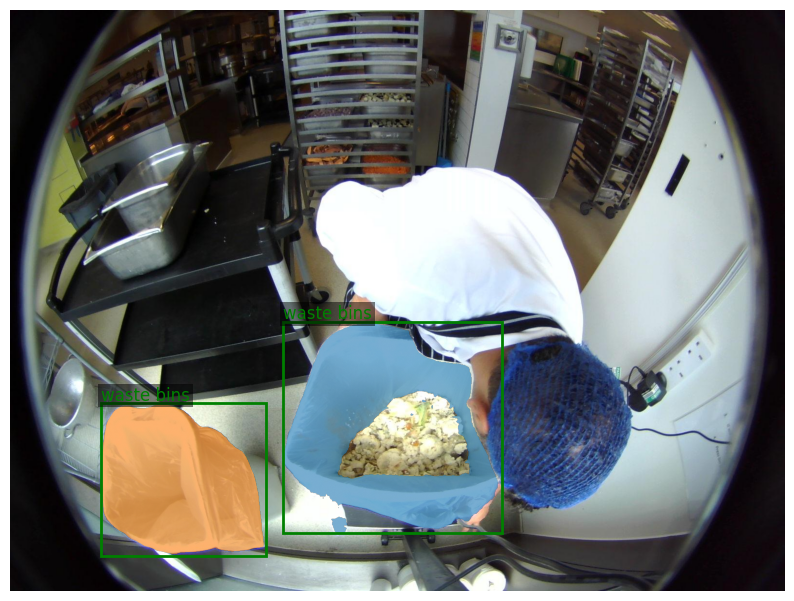

Validation result JSON: {"seg_valid": true}
Segmentation validation result: {'seg_valid': True}


{'messages': [{'role': 'agent',
   'content': '{\n  "labeled_objects": [\n    {\n      "label": "waste bins",\n      "box": [\n        0.352,\n        0.536,\n        0.635,\n        0.900\n      ],\n      "valid": false\n    },\n    {\n      "label": "waste bins",\n      "box": [\n        0.117,\n        0.676,\n        0.330,\n        0.940\n      ],\n      "valid": false\n    }\n  ]\n}'}],
 'labeled_objects': [{'label': 'waste bins',
   'box': [0.352, 0.536, 0.635, 0.9],
   'valid': False},
  {'label': 'waste bins', 'box': [0.117, 0.676, 0.33, 0.94], 'valid': False}],
 'temp_bb_img_path': './data/temp_bb_image.jpg',
 'temp_segm_mask_path': './data/temp_seg_image_bb.jpg',
 'temp_segm_mask_points_path': './data/temp_seg_image_points.jpg',
 'positve_points': [],
 'negative_points': [],
 'bbox_json': '{\n  "labeled_objects": [\n    {\n      "label": "waste bins",\n      "box": [\n        0.352,\n        0.536,\n        0.635,\n        0.900\n      ],\n      "valid": false\n    },\n    {

In [6]:
graph_agent.run(image_path='./data/yolomuf_test3.jpeg', query="Create a bounding box around waste bins in the image.")

In [7]:
from mb_rag.utils.extra import ImagePredictor

In [8]:
a = ImagePredictor('./sam2_hiera_s.yaml','/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt')

In [9]:
a.set_image('./data/yolomuf_test3.jpeg')

In [10]:
a.image.shape

(1200, 1600, 3)

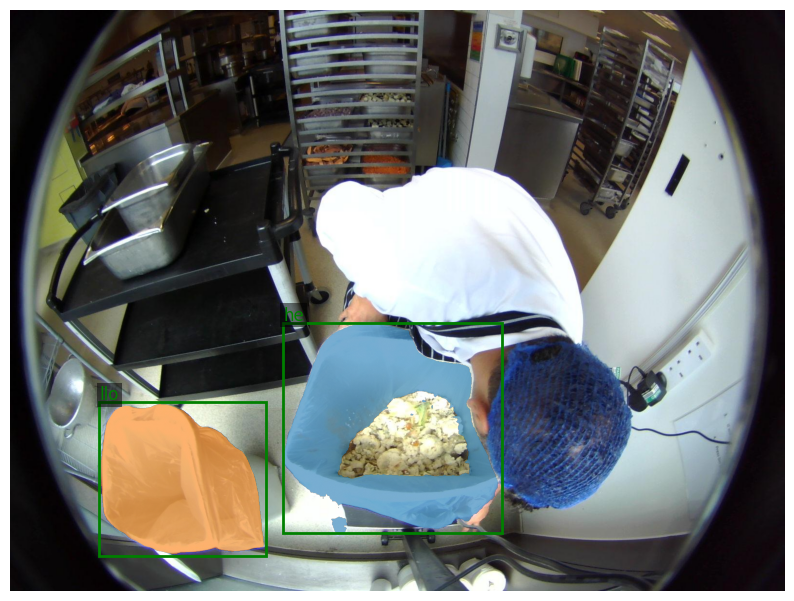

In [11]:
mask,_,_ =a.predict_item(bbox=[[645.6, 563.1999999999999, 1080.0, 1016.0],[810.0, 184.0, 1128.0, 528.0]],labels_names=['he','llo']) 


In [12]:
mask.shape

(2, 1200, 1600)

(1, 1200, 1600)


(-0.5, 1599.5, 1199.5, -0.5)

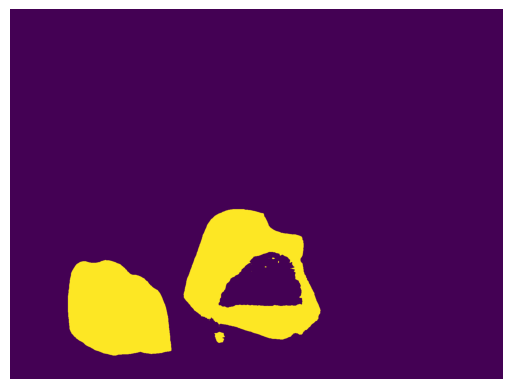

In [13]:
import matplotlib.pyplot as plt
import numpy as np

mask = mask.sum(axis=0)
mask = np.expand_dims(mask, axis=0)
print(mask.shape)
mask_new = np.transpose(mask, (1, 2, 0))
plt.imshow(mask_new)
plt.axis('off')